# import module

In [1]:
%matplotlib inline
%load_ext nb_black
import matplotlib.pyplot as plt
import matplotlib as mpl

from numpy import *
import numpy as np

import pyemma
from pyemma.util.contexts import settings
import pyemma.plots as mplt
import pyemma.msm as msm

from __future__ import print_function
import mdtraj
import mdtraj as md

from tqdm import tqdm
from time import sleep

# import mdshare

<IPython.core.display.Javascript object>

# import data

In [2]:
# 导入轨迹文件
# pdb = "../6wuu.pdb"
# files = "../md_dry_jump_center_mol_center_fit.trr"
pdb = "/home/sean/Desktop/disk/cadd/MSM/zong-acn-msm/acn_top.pdb"
files = "/home/sean/Desktop/disk/cadd/MSM/zong-acn-msm/zong_msm.trr"

print(pdb)
print(files)

# 定义mdtraj
traj = md.load(pdb, files)
topology = traj.topology
print(traj)
print(topology)

/home/sean/Desktop/disk/cadd/MSM/zong-acn-msm/acn_top.pdb
/home/sean/Desktop/disk/cadd/MSM/zong-acn-msm/zong_msm.trr
<mdtraj.Trajectory with 1 frames, 4969 atoms, 316 residues, and unitcells>
<mdtraj.Topology with 1 chains, 316 residues, 4969 atoms, 4865 bonds>


<IPython.core.display.Javascript object>

# Feature selection

In [3]:
# 多段配对原子距离
# thumb2 10-17, 33-40, 53-59, 62-95, 125-153
active_atom1 = topology.select("name CA and resi 9 to 16")
active_atom2 = topology.select("name CA and resi 32 to 39")
active_atom3 = topology.select("name CA and resi 52 to 58")
active_atom4 = topology.select("name CA and resi 61 to 94")
active_atom5 = topology.select("name CA and resi 124 to 152")

distances_feat = pyemma.coordinates.featurizer(pdb)
distances_feat.add_distances(
    distances_feat.pairs(active_atom1, excluded_neighbors=2), periodic=False
)
distances_feat.add_distances(
    distances_feat.pairs(active_atom2, excluded_neighbors=2), periodic=False
)
distances_feat.add_distances(
    distances_feat.pairs(active_atom3, excluded_neighbors=2), periodic=False
)
distances_feat.add_distances(
    distances_feat.pairs(active_atom4, excluded_neighbors=2), periodic=False
)
distances_feat.add_distances(
    distances_feat.pairs(active_atom5, excluded_neighbors=2), periodic=False
)

distances_data = pyemma.coordinates.load(files, features=distances_feat)
labels = ["backbone atom\ndistances"]
distances_feat.describe()

['DIST: THR 10 CA 164 - VAL 11 CA 178',
 'DIST: THR 10 CA 164 - ASP 12 CA 194',
 'DIST: THR 10 CA 164 - ASN 13 CA 206',
 'DIST: THR 10 CA 164 - ILE 14 CA 220',
 'DIST: THR 10 CA 164 - ASN 15 CA 239',
 'DIST: THR 10 CA 164 - LEU 16 CA 253',
 'DIST: THR 10 CA 164 - HISH 17 CA 272',
 'DIST: VAL 11 CA 178 - ASP 12 CA 194',
 'DIST: VAL 11 CA 178 - ASN 13 CA 206',
 'DIST: VAL 11 CA 178 - ILE 14 CA 220',
 'DIST: VAL 11 CA 178 - ASN 15 CA 239',
 'DIST: VAL 11 CA 178 - LEU 16 CA 253',
 'DIST: VAL 11 CA 178 - HISH 17 CA 272',
 'DIST: ASP 12 CA 194 - ASN 13 CA 206',
 'DIST: ASP 12 CA 194 - ILE 14 CA 220',
 'DIST: ASP 12 CA 194 - ASN 15 CA 239',
 'DIST: ASP 12 CA 194 - LEU 16 CA 253',
 'DIST: ASP 12 CA 194 - HISH 17 CA 272',
 'DIST: ASN 13 CA 206 - ILE 14 CA 220',
 'DIST: ASN 13 CA 206 - ASN 15 CA 239',
 'DIST: ASN 13 CA 206 - LEU 16 CA 253',
 'DIST: ASN 13 CA 206 - HISH 17 CA 272',
 'DIST: ILE 14 CA 220 - ASN 15 CA 239',
 'DIST: ILE 14 CA 220 - LEU 16 CA 253',
 'DIST: ILE 14 CA 220 - HISH 17 CA 2

<IPython.core.display.Javascript object>

In [2]:
# 残基坐标
#active_residue1 = arange(259, 290)
#positions_feat = pyemma.coordinates.featurizer(pdb)
#positions_feat.add_residue_COM(active_residue1)
#positions_data = pyemma.coordinates.load(files, features=positions_feat)
#labels = ["backbone atom\npositions"]
#positions_feat.describe()

In [3]:
# 配对原子距离
active_atom1 = topology.select(
    "name CA and resi 12 13 220 221 222 223 264 273 274 284 285 286 289"
)
distances_feat = pyemma.coordinates.featurizer(pdb)
distances_feat.add_distances(
    distances_feat.pairs(active_atom1, excluded_neighbors=2), periodic=False
)
distances_data = pyemma.coordinates.load(files, features=distances_feat)
labels = ["backbone atom\ndistances"]
distances_feat.describe()

['DIST: ASN 13 CA 206 - ILE 14 CA 220',
 'DIST: ASN 13 CA 206 - GLN 221 CA 3479',
 'DIST: ASN 13 CA 206 - ILE 222 CA 3496',
 'DIST: ASN 13 CA 206 - PRO 223 CA 3517',
 'DIST: ASN 13 CA 206 - CYS 224 CA 3529',
 'DIST: ASN 13 CA 206 - THR 265 CA 4150',
 'DIST: ASN 13 CA 206 - LYS 274 CA 4280',
 'DIST: ASN 13 CA 206 - HISD 275 CA 4302',
 'DIST: ASN 13 CA 206 - ILE 285 CA 4465',
 'DIST: ASN 13 CA 206 - ASP 286 CA 4484',
 'DIST: ASN 13 CA 206 - GLY 287 CA 4496',
 'DIST: ASN 13 CA 206 - LEU 290 CA 4532',
 'DIST: ILE 14 CA 220 - GLN 221 CA 3479',
 'DIST: ILE 14 CA 220 - ILE 222 CA 3496',
 'DIST: ILE 14 CA 220 - PRO 223 CA 3517',
 'DIST: ILE 14 CA 220 - CYS 224 CA 3529',
 'DIST: ILE 14 CA 220 - THR 265 CA 4150',
 'DIST: ILE 14 CA 220 - LYS 274 CA 4280',
 'DIST: ILE 14 CA 220 - HISD 275 CA 4302',
 'DIST: ILE 14 CA 220 - ILE 285 CA 4465',
 'DIST: ILE 14 CA 220 - ASP 286 CA 4484',
 'DIST: ILE 14 CA 220 - GLY 287 CA 4496',
 'DIST: ILE 14 CA 220 - LEU 290 CA 4532',
 'DIST: GLN 221 CA 3479 - ILE 222 

<IPython.core.display.Javascript object>

In [3]:
# 多段配对原子距离
active_atom1 = topology.select("name CA and resi 99 to 120")
active_atom2 = topology.select("name CA and resi 259 to 290")
distances_feat = pyemma.coordinates.featurizer(pdb)
distances_feat.add_distances(
    distances_feat.pairs(active_atom1, excluded_neighbors=2), periodic=False
)
distances_feat.add_distances(
    distances_feat.pairs(active_atom2, excluded_neighbors=2), periodic=False
)
distances_data = pyemma.coordinates.load(files, features=distances_feat)
labels = ["backbone atom\ndistances"]
distances_feat.describe()

['DIST: GLY 100 CA 1596 - LEU 101 CA 1603',
 'DIST: GLY 100 CA 1596 - THR 102 CA 1622',
 'DIST: GLY 100 CA 1596 - SER 103 CA 1636',
 'DIST: GLY 100 CA 1596 - ILE 104 CA 1647',
 'DIST: GLY 100 CA 1596 - LYS 105 CA 1666',
 'DIST: GLY 100 CA 1596 - TRP 106 CA 1688',
 'DIST: GLY 100 CA 1596 - ALA 107 CA 1712',
 'DIST: GLY 100 CA 1596 - ASP 108 CA 1722',
 'DIST: GLY 100 CA 1596 - ASN 109 CA 1734',
 'DIST: GLY 100 CA 1596 - ASN 110 CA 1748',
 'DIST: GLY 100 CA 1596 - CYS 111 CA 1762',
 'DIST: GLY 100 CA 1596 - TYR 112 CA 1773',
 'DIST: GLY 100 CA 1596 - LEU 113 CA 1794',
 'DIST: GLY 100 CA 1596 - ALA 114 CA 1813',
 'DIST: GLY 100 CA 1596 - THR 115 CA 1823',
 'DIST: GLY 100 CA 1596 - ALA 116 CA 1837',
 'DIST: GLY 100 CA 1596 - LEU 117 CA 1847',
 'DIST: GLY 100 CA 1596 - LEU 118 CA 1866',
 'DIST: GLY 100 CA 1596 - THR 119 CA 1885',
 'DIST: GLY 100 CA 1596 - LEU 120 CA 1899',
 'DIST: GLY 100 CA 1596 - GLN 121 CA 1918',
 'DIST: LEU 101 CA 1603 - THR 102 CA 1622',
 'DIST: LEU 101 CA 1603 - SER 10

<IPython.core.display.Javascript object>

In [ ]:
# 多段残基坐标
# active_residue1 = arange(99, 120)
# active_residue2 = arange(259, 290)
# active_residue = list(active_residue1) + list(active_residue2)
# positions_feat = pyemma.coordinates.featurizer(pdb)
# positions_feat.add_residue_COM(active_residue)
# positions_data = pyemma.coordinates.load(files, features=positions_feat)
# labels = ["backbone atom\npositions"]
# positions_feat.describe()

In [ ]:
# 多段扭转角
# active_resi1 = "resi 100 to 120"
# active_resi2 = "resi 259 to 290"
# torsions_feat = pyemma.coordinates.featurizer(pdb)
# torsions_feat.add_sidechain_torsions(selstr=active_resi1, cossin=True, periodic=False)
# torsions_feat.add_sidechain_torsions(selstr=active_resi2, cossin=True, periodic=False)
# torsions_data = pyemma.coordinates.load(files, features=torsions_feat)
# labels = ["backbone\ntorsions"]
# torsions_feat.describe()

In [ ]:
# add_sidechain_torsions (same to chi1 angle)
# torsions_feat = pyemma.coordinates.featurizer(pdb)
# torsions_feat.add_sidechain_torsions(
#    selstr="name CA and resi 259 to 289", cossin=True, periodic=False, which="chi1"
# )
# torsions_data = pyemma.coordinates.load(files, features=torsions_feat)
# labels = ["backbone\ntorsions"]
# torsions_feat.describe()
# type(torsions_feat)
# type(torsions_data)

In [ ]:
# chi1 angle
# torsions_feat = pyemma.coordinates.featurizer(pdb)
# torsions_feat.add_chi1_torsions(
#    selstr="name CA and resi 259 to 289", cossin=True, periodic=False
# )
# torsions_data = pyemma.coordinates.load(files, features=torsions_feat)
# labels = ["backbone\ntorsions"]
# torsions_feat.describe()
# type(torsions_feat)
# type(torsions_data)

# chi1 angle
# The chi1 angle is given in the side chain panel.
# Ideally, values of chi1 should be 60, 180, and -60.
# The chi1 angle is defined as the dihedral angle between the N -- CA -- CB -- XG of the same residue (where XG is either CG or OG)

In [3]:
# 主干扭转角
# torsions_feat = pyemma.coordinates.featurizer(pdb)
# torsions_feat.add_backbone_torsions(cossin=True, periodic=False)
# torsions_data = pyemma.coordinates.load(files, features=torsions_feat)
# labels = ["backbone\ntorsions"]
# torsions_feat.describe()

<IPython.core.display.Javascript object>

In [3]:
# CA原子位置
# feat = pyemma.coordinates.featurizer(pdb)
# active_atom = topology.select("name CA and resi 259 to 289")
# feat.add_selection(active_atom)
# distances_data = pyemma.coordinates.load(files, features=feat)
# feat.describe()

<IPython.core.display.Javascript object>

In [4]:
# RMSD
# positions_feat = pyemma.coordinates.featurizer(pdb)
# positions_feat.add_minrmsd_to_ref(files, ref_frame=100, atom_indices="name CA and resi 259 to 289")
# positions_data = pyemma.coordinates.load(files, features=feat)
# labels = ["backbone atom\npositions"]
# positions_feat.describe()

# positions_feat.add_minrmsd_to_ref(traj, ref_frame=0, atom_indices=None, precentered=False)

<IPython.core.display.Javascript object>

In [6]:
# 多段残基坐标
# feat = pyemma.coordinates.featurizer(pdb)
# active_residue1 = arange(259, 290)
# active_residue2 = arange(220, 240)
# active_residue3 = arange(180, 200)
# active_residue  = list(active_residue1)+list(active_residue2)+list(active_residue3)
# feat.add_residue_COM(active_residue)
# distances_data = pyemma.coordinates.load(files, features=feat)
# feat.describe()

<IPython.core.display.Javascript object>

# Coordinate transform and discretization

## Time-lagged independent component analysis (TICA)

In [21]:
tica = pyemma.coordinates.tica(distances_data, lag=5)
tica_output = tica.get_output()
tica_concatenated = np.concatenate(tica_output)

<IPython.core.display.Javascript object>

RuntimeError: This function is only useful for less than 50 dimensions. Turn-off this warning at your own risk with ignore_dim_warning=True.

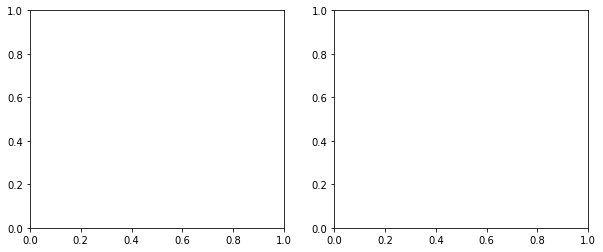

<IPython.core.display.Javascript object>

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
pyemma.plots.plot_feature_histograms(
    tica_concatenated,
    ax=axes[0],
    feature_labels=["IC1", "IC2", "IC3", "IC4"],
    ylog=True,
)
pyemma.plots.plot_density(*tica_concatenated[:, :2].T, ax=axes[1], logscale=True)
axes[1].set_xlabel("IC 1")
axes[1].set_ylabel("IC 2")
fig.tight_layout()

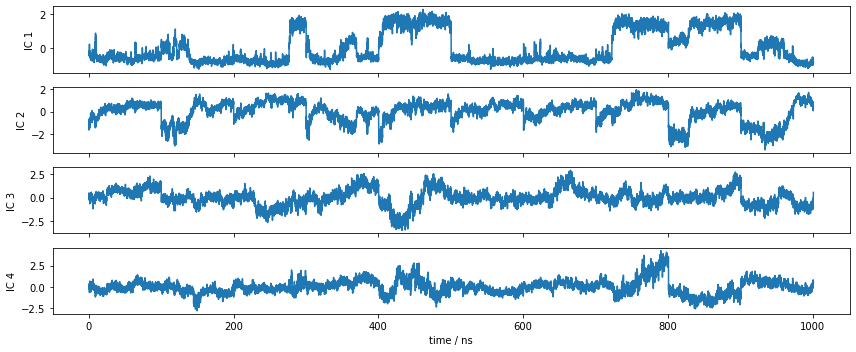

<IPython.core.display.Javascript object>

In [23]:
fig, axes = plt.subplots(4, 1, figsize=(12, 5), sharex=True)
x = 0.1 * np.arange(tica_output[0].shape[0])
for i, (ax, tic) in enumerate(zip(axes.flat, tica_output[0].T)):
    ax.plot(x, tic)
    ax.set_ylabel("IC {}".format(i + 1))
axes[-1].set_xlabel("time / ns")
fig.tight_layout()

## Clustering and Discretization

bar:   0%|                                                | 0/5 [00:00<?, ?it/s]

27-07-22 12:25:14 pyemma.msm.estimators.maximum_likelihood_msm.MaximumLikelihoodMSM[2284] WARNING  Requested scoring rank 10 exceeds number of MSM states. Reduced to score_k = 9


bar: 100%|████████████████████████████████████████| 5/5 [00:00<00:00,  5.73it/s]


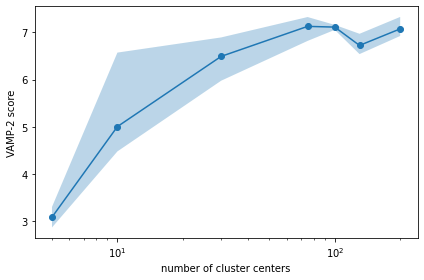

<IPython.core.display.Javascript object>

In [32]:
n_clustercenters = [5, 10, 30, 75, 100, 130, 200]

scores = np.zeros((len(n_clustercenters), 5))
for n, k in enumerate(n_clustercenters):
    for m in tqdm(range(5), ncols=80, desc="bar", colour="blue"):
        sleep(0.05)
        with pyemma.util.contexts.settings(show_progress_bars=False):
            _cl = pyemma.coordinates.cluster_kmeans(
                tica_output, k=k, max_iter=50, stride=50
            )
            _msm = pyemma.msm.estimate_markov_model(_cl.dtrajs, 5)
            scores[n, m] = _msm.score_cv(
                _cl.dtrajs, n=1, score_method="VAMP2", score_k=min(10, k)
            )

fig, ax = plt.subplots()
lower, upper = pyemma.util.statistics.confidence_interval(scores.T.tolist(), conf=0.9)
ax.fill_between(n_clustercenters, lower, upper, alpha=0.3)
ax.plot(n_clustercenters, np.mean(scores, axis=1), "-o")
ax.semilogx()
ax.set_xlabel("number of cluster centers")
ax.set_ylabel("VAMP-2 score")
fig.tight_layout()

In [54]:
cluster = pyemma.coordinates.cluster_kmeans(
    tica_output, k=100, max_iter=50, stride=10, fixed_seed=1
)
dtrajs_concatenated = np.concatenate(cluster.dtrajs)

initialize kmeans++ centers:   0%|                      | 0/100 [00:00<?, ?it/s]

kmeans iterations:   0%|                                 | 0/50 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

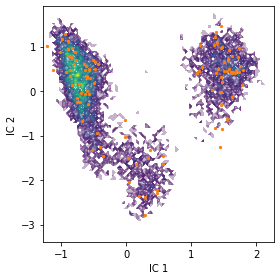

<IPython.core.display.Javascript object>

In [55]:
fig, ax = plt.subplots(figsize=(4, 4))
pyemma.plots.plot_density(*tica_concatenated[:, :2].T, ax=ax, cbar=False, alpha=0.3)
ax.scatter(*cluster.clustercenters[:, :2].T, s=5, c="C1")
ax.set_xlabel("IC 1")
ax.set_ylabel("IC 2")
fig.tight_layout()

# MSM estimation and validation

## Implied timescales

estimating BayesianMSM:   0%|                            | 0/10 [00:00<?, ?it/s]

<AxesSubplot:xlabel='lag time / ns', ylabel='timescale / ns'>

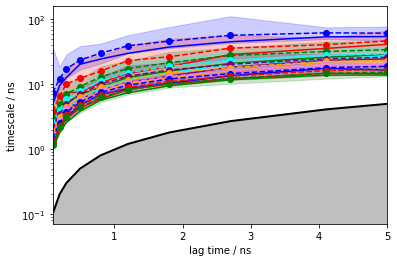

<IPython.core.display.Javascript object>

In [56]:
its = pyemma.msm.its(cluster.dtrajs, lags=50, nits=10, errors="bayes")
pyemma.plots.plot_implied_timescales(its, units="ns", dt=0.1)

In [57]:
msm = pyemma.msm.bayesian_markov_model(cluster.dtrajs, lag=5, dt_traj="0.1 ns")
print("fraction of states used = {:.2f}".format(msm.active_state_fraction))
print("fraction of counts used = {:.2f}".format(msm.active_count_fraction))

pyemma.msm.estimators.bayesian_msm.BayesianMSM[2408]: compute stat. inefficienci

pyemma.msm.estimators.bayesian_msm.BayesianMSM[2408]: Sampling MSMs:   0%| | 0/1

fraction of states used = 1.00
fraction of counts used = 1.00


<IPython.core.display.Javascript object>

## Chapman-Kolmogorov test

estimating BayesianMSM:   0%|                             | 0/5 [00:00<?, ?it/s]

(<Figure size 720x720 with 25 Axes>,
 array([[<AxesSubplot:ylabel='probability'>, <AxesSubplot:>,
         <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:ylabel='probability'>, <AxesSubplot:>,
         <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:ylabel='probability'>, <AxesSubplot:>,
         <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:ylabel='probability'>, <AxesSubplot:>,
         <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:xlabel='lag time (ns)', ylabel='probability'>,
         <AxesSubplot:xlabel='lag time (ns)'>,
         <AxesSubplot:xlabel='lag time (ns)'>,
         <AxesSubplot:xlabel='lag time (ns)'>,
         <AxesSubplot:xlabel='lag time (ns)'>]], dtype=object))

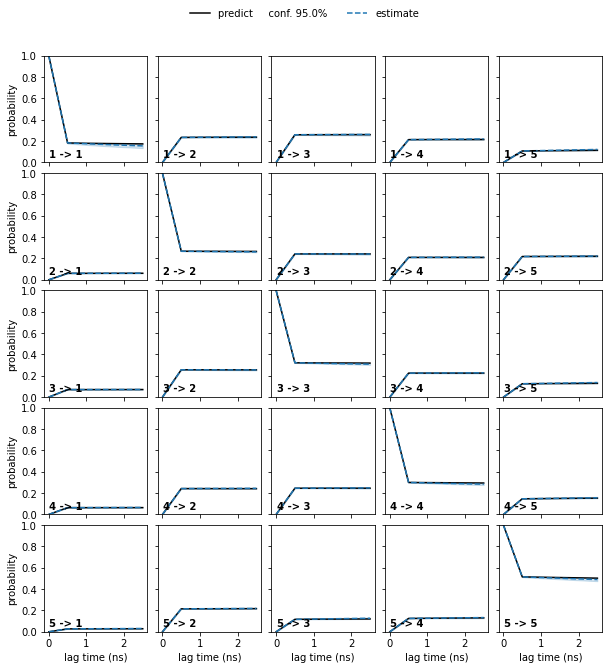

<IPython.core.display.Javascript object>

In [58]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

nstates = 5
cktest = msm.cktest(nstates, mlags=6)
pyemma.plots.plot_cktest(cktest, dt=0.1, units="ns")


# MSM spectral analysis

ValueError: The number of FixedLocator locations (14), usually from a call to set_ticks, does not match the number of ticklabels (16).

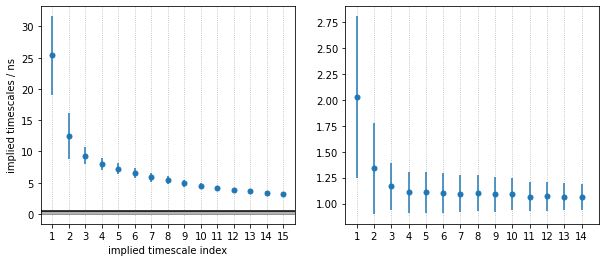

<IPython.core.display.Javascript object>

In [59]:
def its_separation_err(ts, ts_err):
    """
    Error propagation from ITS standard deviation to timescale separation.
    """
    return (
        ts[:-1]
        / ts[1:]
        * np.sqrt((ts_err[:-1] / ts[:-1]) ** 2 + (ts_err[1:] / ts[1:]) ** 2)
    )


nits = 15

timescales_mean = msm.sample_mean("timescales", k=nits)
timescales_std = msm.sample_std("timescales", k=nits)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].errorbar(
    range(1, nits + 1), timescales_mean, yerr=timescales_std, fmt=".", markersize=10
)
axes[1].errorbar(
    range(1, nits),
    timescales_mean[:-1] / timescales_mean[1:],
    yerr=its_separation_err(timescales_mean, timescales_std),
    fmt=".",
    markersize=10,
    color="C0",
)

for i, ax in enumerate(axes):
    ax.set_xticks(range(1, nits + 1))
    ax.grid(True, axis="x", linestyle=":")

axes[0].axhline(msm.lag * 0.1, lw=1.5, color="k")
axes[0].axhspan(0, msm.lag * 0.1, alpha=0.3, color="k")
axes[0].set_xlabel("implied timescale index")
axes[0].set_ylabel("implied timescales / ns")
axes[1].set_xticks(range(1, nits))
axes[1].set_xticklabels(
    ["{:d}/{:d}".format(k, k + 1) for k in range(1, nits + 2)], rotation=45
)
axes[1].set_xlabel("implied timescale indices")
axes[1].set_ylabel("timescale separation")
fig.tight_layout()

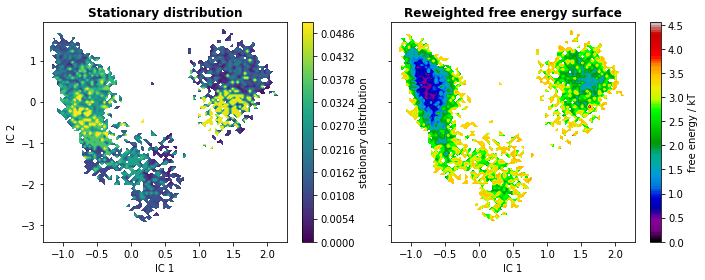

<IPython.core.display.Javascript object>

In [60]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)
pyemma.plots.plot_contour(
    *tica_concatenated[:, :2].T,
    msm.pi[dtrajs_concatenated],
    ax=axes[0],
    mask=True,
    cbar_label="stationary distribution"
)
pyemma.plots.plot_free_energy(
    *tica_concatenated[:, :2].T,
    weights=np.concatenate(msm.trajectory_weights()),
    ax=axes[1],
    legacy=False
)
for ax in axes.flat:
    ax.set_xlabel("IC 1")
axes[0].set_ylabel("IC 2")
axes[0].set_title("Stationary distribution", fontweight="bold")
axes[1].set_title("Reweighted free energy surface", fontweight="bold")
fig.tight_layout()

The first eigenvector is one: True (min=0.9999999999999573, max=1.00000000000005)


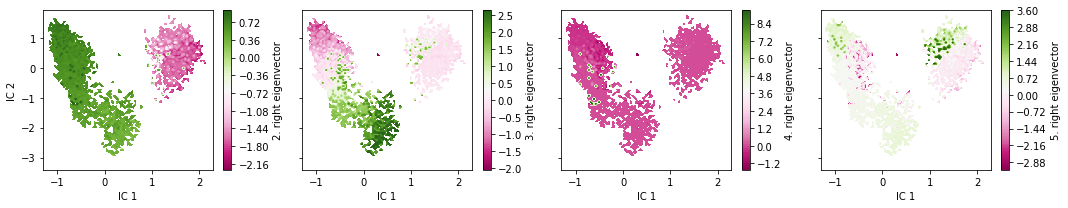

<IPython.core.display.Javascript object>

In [61]:
eigvec = msm.eigenvectors_right()
print(
    "The first eigenvector is one: {} (min={}, max={})".format(
        np.allclose(eigvec[:, 0], 1, atol=1e-15), eigvec[:, 0].min(), eigvec[:, 0].max()
    )
)

fig, axes = plt.subplots(1, 4, figsize=(15, 3), sharex=True, sharey=True)
for i, ax in enumerate(axes.flat):
    pyemma.plots.plot_contour(
        *tica_concatenated[:, :2].T,
        eigvec[dtrajs_concatenated, i + 1],
        ax=ax,
        cmap="PiYG",
        cbar_label="{}. right eigenvector".format(i + 2),
        mask=True
    )
    ax.set_xlabel("IC 1")
axes[0].set_ylabel("IC 2")
fig.tight_layout()

# PCCA & TPT 

## Perron cluster cluster analysis (PCCA)

In [77]:
nstates = 5
msm.pcca(nstates)
for i, s in enumerate(msm.metastable_sets):
    print("π_{} = {:f}".format(i + 1, msm.pi[s].sum()))
# print out the stationary probabilities of the metastable sets

π_1 = 0.012969
π_2 = 0.003921
π_3 = 0.503211
π_4 = 0.231719
π_5 = 0.248181


<IPython.core.display.Javascript object>

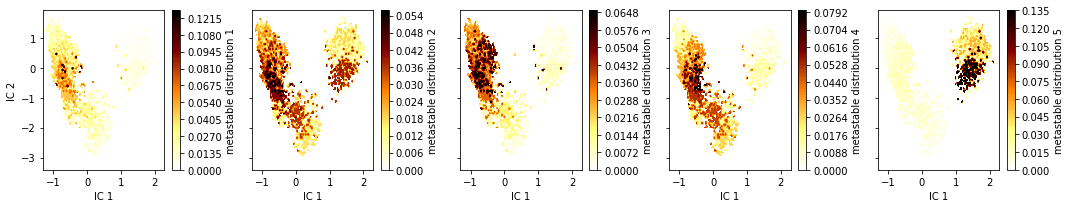

<IPython.core.display.Javascript object>

In [78]:
fig, axes = plt.subplots(1, 5, figsize=(15, 3), sharex=True, sharey=True)
for i, ax in enumerate(axes.flat):
    pyemma.plots.plot_contour(
        *tica_concatenated[:, :2].T,
        msm.metastable_distributions[i][dtrajs_concatenated],
        ax=ax,
        cmap="afmhot_r",
        mask=True,
        cbar_label="metastable distribution {}".format(i + 1)
    )
    ax.set_xlabel("IC 1")
axes[0].set_ylabel("IC 2")
fig.tight_layout()

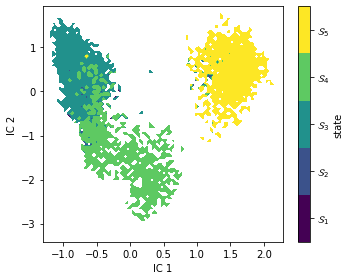

<IPython.core.display.Javascript object>

In [79]:
metastable_traj = msm.metastable_assignments[dtrajs_concatenated]

fig, ax = plt.subplots(figsize=(5, 4))
_, _, misc = pyemma.plots.plot_state_map(
    *tica_concatenated[:, :2].T, metastable_traj, ax=ax
)
ax.set_xlabel("IC 1")
ax.set_ylabel("IC 2")
misc["cbar"].set_ticklabels([r"$\mathcal{S}_%d$" % (i + 1) for i in range(nstates)])
fig.tight_layout()

In [80]:
# PCCA by distances
pcca_samples = msm.sample_by_distributions(msm.metastable_distributions, 10)
distances_source = pyemma.coordinates.source(files, features=distances_feat)
pyemma.coordinates.save_trajs(
    distances_source,
    pcca_samples,
    outfiles=[
        "./data/acn/distance_data/pcca{}_10samples.pdb".format(n + 1)
        for n in range(msm.n_metastable)
    ],
)

['./data/acn/distance_data/pcca1_10samples.pdb',
 './data/acn/distance_data/pcca2_10samples.pdb',
 './data/acn/distance_data/pcca3_10samples.pdb',
 './data/acn/distance_data/pcca4_10samples.pdb',
 './data/acn/distance_data/pcca5_10samples.pdb']

<IPython.core.display.Javascript object>

In [28]:
# PCCA by positions
# pcca_samples = msm.sample_by_distributions(msm.metastable_distributions, 10)
# positions_source = pyemma.coordinates.source(files, features=positions_feat)
# pyemma.coordinates.save_trajs(
#    positions_source,
#    pcca_samples,
#    outfiles=[
#        "./data/pcca{}_10samples.pdb".format(n + 1) for n in range(msm.n_metastable)
#    ],
# )

<IPython.core.display.Javascript object>

In [29]:
# PCCA by torsions
# pcca_samples = msm.sample_by_distributions(msm.metastable_distributions, 10)
# torsions_source = pyemma.coordinates.source(files, features=torsions_feat)
# pyemma.coordinates.save_trajs(
#    torsions_source,
#    pcca_samples,
#    outfiles=[
#        "./data/pcca{}_10samples.pdb".format(n + 1) for n in range(msm.n_metastable)
#    ],
# )

<IPython.core.display.Javascript object>

In [81]:
# calculate rmsd
target1 = "./data/acn/distance_data/pcca1_10samples.pdb"
first_frame1 = md.load_frame(target1, 0, topology)
rmsd1 = md.rmsd(first_frame1, traj, 0)

target2 = "./data/acn/distance_data/pcca2_10samples.pdb"
first_frame2 = md.load_frame(target2, 0, topology)
rmsd2 = md.rmsd(first_frame2, traj, 0)

target3 = "./data/acn/distance_data/pcca3_10samples.pdb"
first_frame3 = md.load_frame(target3, 0, topology)
rmsd3 = md.rmsd(first_frame3, traj, 0)

target4 = "./data/acn/distance_data/pcca4_10samples.pdb"
first_frame4 = md.load_frame(target4, 0, topology)
rmsd4 = md.rmsd(first_frame4, traj, 0)

target5 = "./data/acn/distance_data/pcca5_10samples.pdb"
first_frame5 = md.load_frame(target5, 0, topology)
rmsd5 = md.rmsd(first_frame5, traj, 0)

print(target1, rmsd1)
print(target2, rmsd2)
print(target3, rmsd3)
print(target4, rmsd4)
print(target5, rmsd5)
# rmsda = rmsd * 10
# print("rmsda", "Å")

./data/acn/distance_data/pcca1_10samples.pdb [0.2858615]
./data/acn/distance_data/pcca2_10samples.pdb [0.26627153]
./data/acn/distance_data/pcca3_10samples.pdb [0.4255254]
./data/acn/distance_data/pcca4_10samples.pdb [0.23783843]
./data/acn/distance_data/pcca5_10samples.pdb [0.37486267]


<IPython.core.display.Javascript object>

In [82]:
# calculate probabilities and free energy of the metastable sets
print("state\tπ\t\tG/kT")
for i, s in enumerate(msm.metastable_sets):
    p = msm.pi[s].sum()
    print("{}\t{:f}\t{:f}".format(i + 1, p, -np.log(p)))

state	π		G/kT
1	0.012969	4.345191
2	0.003921	5.541455
3	0.503211	0.686746
4	0.231719	1.462231
5	0.248181	1.393598


<IPython.core.display.Javascript object>

In [83]:
from itertools import product

mfpt = np.zeros((nstates, nstates))
for i, j in product(range(nstates), repeat=2):
    mfpt[i, j] = msm.mfpt(msm.metastable_sets[i], msm.metastable_sets[j])

from pandas import DataFrame

print("MFPT / ns:")
DataFrame(
    np.round(mfpt, decimals=2),
    index=range(1, nstates + 1),
    columns=range(1, nstates + 1),
)

MFPT / ns:


,1,2,3,4,5
1,0.00,902.31,7.47,22.44,84.75
2,546.19,0.00,24.79,22.60,30.68
3,524.88,898.26,0.00,21.43,77.88
4,531.08,884.10,11.68,0.00,75.24
5,554.92,864.18,30.75,39.25,0.00


<IPython.core.display.Javascript object>

In [84]:
A = msm.metastable_sets[0]
B = np.concatenate(msm.metastable_sets[4:])
print(
    "MFPT 1 -> other: ({:6.1f} ± {:5.1f}) ns".format(
        msm.sample_mean("mfpt", A, B), msm.sample_std("mfpt", A, B)
    )
)
print(
    "MFPT other -> 1: ({:.1f} ± {:5.1f}) ns".format(
        msm.sample_mean("mfpt", B, A), msm.sample_std("mfpt", B, A)
    )
)

MFPT 1 -> other: (  93.0 ±  19.1) ns
MFPT other -> 1: (858.7 ± 622.0) ns


<IPython.core.display.Javascript object>

In [85]:
A = msm.metastable_sets[2]
B = np.concatenate(msm.metastable_sets[4:])
print(
    "MFPT 1 -> other: ({:6.1f} ± {:5.1f}) ns".format(
        msm.sample_mean("mfpt", A, B), msm.sample_std("mfpt", A, B)
    )
)
print(
    "MFPT other -> 1: ({:.1f} ± {:5.1f}) ns".format(
        msm.sample_mean("mfpt", B, A), msm.sample_std("mfpt", B, A)
    )
)

MFPT 1 -> other: (  83.7 ±  18.4) ns
MFPT other -> 1: (37.7 ±   9.5) ns


<IPython.core.display.Javascript object>

In [86]:
A = msm.metastable_sets[3]
B = np.concatenate(msm.metastable_sets[4:])
print(
    "MFPT 1 -> other: ({:6.1f} ± {:5.1f}) ns".format(
        msm.sample_mean("mfpt", A, B), msm.sample_std("mfpt", A, B)
    )
)
print(
    "MFPT other -> 1: ({:.1f} ± {:5.1f}) ns".format(
        msm.sample_mean("mfpt", B, A), msm.sample_std("mfpt", B, A)
    )
)

MFPT 1 -> other: (  81.4 ±  17.8) ns
MFPT other -> 1: (47.1 ±  10.5) ns


<IPython.core.display.Javascript object>

In [87]:
A = msm.metastable_sets[1]
B = np.concatenate(msm.metastable_sets[4:])
print(
    "MFPT 1 -> other: ({:6.1f} ± {:5.1f}) ns".format(
        msm.sample_mean("mfpt", A, B), msm.sample_std("mfpt", A, B)
    )
)
print(
    "MFPT other -> 1: ({:.1f} ± {:5.1f}) ns".format(
        msm.sample_mean("mfpt", B, A), msm.sample_std("mfpt", B, A)
    )
)

MFPT 1 -> other: (  31.4 ±  15.0) ns
MFPT other -> 1: (1477.7 ± 1377.4) ns


<IPython.core.display.Javascript object>

## Transition path theory (TPT)

In [88]:
start, final = 3, 4
# The flux between metastable states can be computed and coarse-grained as follows. As an example, we compute the flux between metastable states 1 and 2
A = msm.metastable_sets[start]
B = msm.metastable_sets[final]
flux = pyemma.msm.tpt(msm, A, B)

cg, cgflux = flux.coarse_grain(msm.metastable_sets)
print(msm)
print(cgflux)
cgflux.pathways()

BayesianMSM(conf=0.95, connectivity='largest', core_set=None,
      count_mode='effective', dt_traj='0.1 ns', lag=5,
      milestoning_method='last_core', mincount_connectivity='1/n',
      nsamples=100, nsteps=10, reversible=True, show_progress=True,
      sparse=False, statdist_constraint=None)
ReactiveFlux(A=[0], B=[4], dt_model=[TimeUnit 0.5 ns],
       flux=array([[0.00000e+00, 2.57648e-05, 3.75164e-04, 5.17246e-03, 3.36572e-03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, 2.57648e-05, 0.00000e+00],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 3.75164e-04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 5.19822e-03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00]]),
       gross_flux=array([[0.00000e+00, 2.57648e-05, 3.75164e-04, 5.17246e-03, 3.36572e-03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, 2.04984e-04, 0.00000e+00],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 3.75164e-04],
       [0.00000e+00, 1.

([array([0, 3, 4], dtype=int32),
  array([0, 4], dtype=int32),
  array([0, 2, 4], dtype=int32),
  array([0, 1, 3, 4], dtype=int32)],
 [0.00517245965748116,
  0.003365719340280268,
  0.00037516406420263614,
  2.5764808513404453e-05])

<IPython.core.display.Javascript object>

In [89]:
(paths, pathfluxes) = cgflux.pathways(fraction=0.99)
cumflux = 0
print("Path flux\t\t%path\t%of total\tpath")
for i in range(len(paths)):
    cumflux += pathfluxes[i]
    print(
        pathfluxes[i],
        "\t",
        "%3.1f" % (100.0 * pathfluxes[i] / cgflux.total_flux),
        "%\t",
        "%3.1f" % (100.0 * cumflux / cgflux.total_flux),
        "%\t\t",
        paths[i] + 1,
    )

Path flux		%path	%of total	path
0.00517245965748116 	 57.9 %	 57.9 %		 [1 4 5]
0.003365719340280268 	 37.7 %	 95.5 %		 [1 5]
0.00037516406420263614 	 4.2 %	 99.7 %		 [1 3 5]


<IPython.core.display.Javascript object>

(<Figure size 732.785x864 with 1 Axes>,
 array([[0.48772465, 0.        ],
        [0.43110511, 1.        ],
        [0.        , 0.14468642],
        [0.84813022, 0.3193005 ],
        [0.38103125, 0.33718869]]))

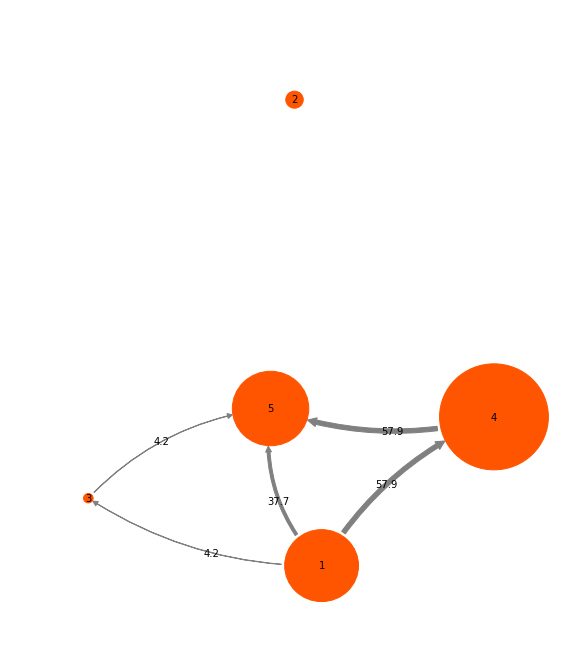

<IPython.core.display.Javascript object>

In [90]:
Fsub = cgflux.major_flux(fraction=0.99)
# print(Fsub)
Fsubpercent = 100.0 * Fsub / cgflux.total_flux
mplt.plot_network(
    Fsubpercent,
    state_sizes=cgflux.stationary_distribution,
    arrow_label_format="%3.1f",
    state_labels=range(1, nstates + 1),
)

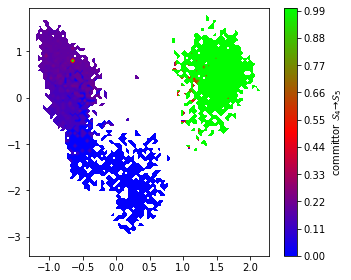

<IPython.core.display.Javascript object>

In [91]:
fig, ax = plt.subplots(figsize=(5, 4))

pyemma.plots.plot_contour(
    *tica_concatenated[:, :2].T,
    flux.committor[dtrajs_concatenated],
    cmap="brg",
    ax=ax,
    mask=True,
    cbar_label=r"committor $\mathcal{S}_%d \to \mathcal{S}_%d$" % (start + 1, final + 1)
)
fig.tight_layout()

## MSM network

In [92]:
print(mfpt)
inverse_mfpt = np.zeros_like(mfpt)
print(inverse_mfpt)
nz = mfpt.nonzero()
inverse_mfpt[nz] = 1.0 / mfpt[nz]
print(inverse_mfpt)
disc_size = []
for i, s in enumerate(msm.metastable_sets):
    p = msm.pi[s].sum()
    disc_size.append(int(p * 100))
print(disc_size)
type(disc_size)
disc_size = np.array(disc_size)
print(disc_size)
type(disc_size)

[[  0.         902.31450603   7.46529989  22.44152283  84.75321632]
 [546.18530852   0.          24.79347897  22.60028588  30.68088415]
 [524.88009973 898.2608841    0.          21.42795634  77.87656782]
 [531.07728389 884.10180856  11.67855284   0.          75.23935015]
 [554.91553336 864.18197813  30.7484626   39.25244782   0.        ]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[0.         0.00110826 0.13395309 0.04456026 0.01179896]
 [0.00183088 0.         0.04033319 0.04424723 0.03259358]
 [0.0019052  0.00111326 0.         0.04666801 0.01284083]
 [0.00188297 0.00113109 0.08562705 0.         0.01329092]
 [0.00180208 0.00115716 0.03252195 0.02547612 0.        ]]
[1, 0, 50, 23, 24]
[ 1  0 50 23 24]


numpy.ndarray

<IPython.core.display.Javascript object>

(<Figure size 707.595x864 with 1 Axes>,
 array([[0.46865488, 0.42979713],
        [0.2037303 , 0.39335215],
        [0.8189762 , 0.        ],
        [0.        , 1.        ],
        [0.55368903, 0.68225041]]))

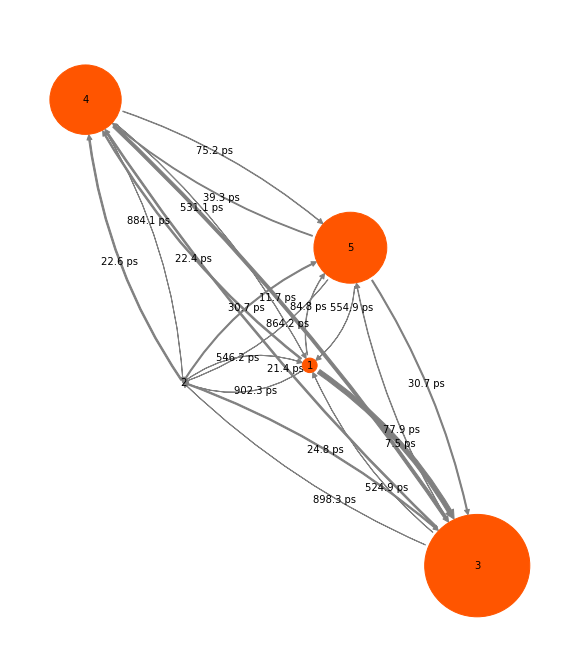

<IPython.core.display.Javascript object>

In [93]:
pyemma.plots.plot_network(
    inverse_mfpt,
    arrow_label_format="%.1f ps",
    arrow_labels=mfpt,
    state_labels=range(1, nstates + 1),
    state_sizes=disc_size,
)

# arrow_label_format="%.1f ps" -- float类型，输出时小数点后有一位小数
# arrow_label_format="%10.2f"  -- %10.2f 实数输出，10列，保留两位小数位
# state_labels=range(1, nstates + 1) -- 标签

In [ ]:
# print(msm.metastable_sets)

In [ ]:
# paths, path_fluxes = cgflux.pathways(fraction=0.99)
# print("percentage       \tpath")
# print("-------------------------------------")
# for i in range(len(paths)):
#    print((path_fluxes[i] / np.sum(path_fluxes)), " \t", paths[i] + 1)
#  print((path_fluxes[i] / np.sum(path_fluxes)), " \t", paths[i]) -- 未修正标签

In [ ]:
# print("\n**Gross flux illustration**: ")
# mplt.plot_flux(
#    cgflux,
#    arrow_label_format="%10.4f",
#    state_labels=range(1, nstates + 1),
#    attribute_to_plot="gross_flux",
#    state_sizes=disc_size,
# )
# state_labels=range(1, nstates + 1),